# 1498. Number of Subsequences That Satisfy the Given Sum Condition

### Difficulty: <font color = orange> Medium </font>

---

You are given an array of integers `nums` and an integer `target`.

Return the number of non-empty subsequences of `nums` such that the sum of the minimum and maximum element on it is less or equal to `target`. Since the answer may be too large, return it modulo <b>$10^9 + 7$</b>.

---

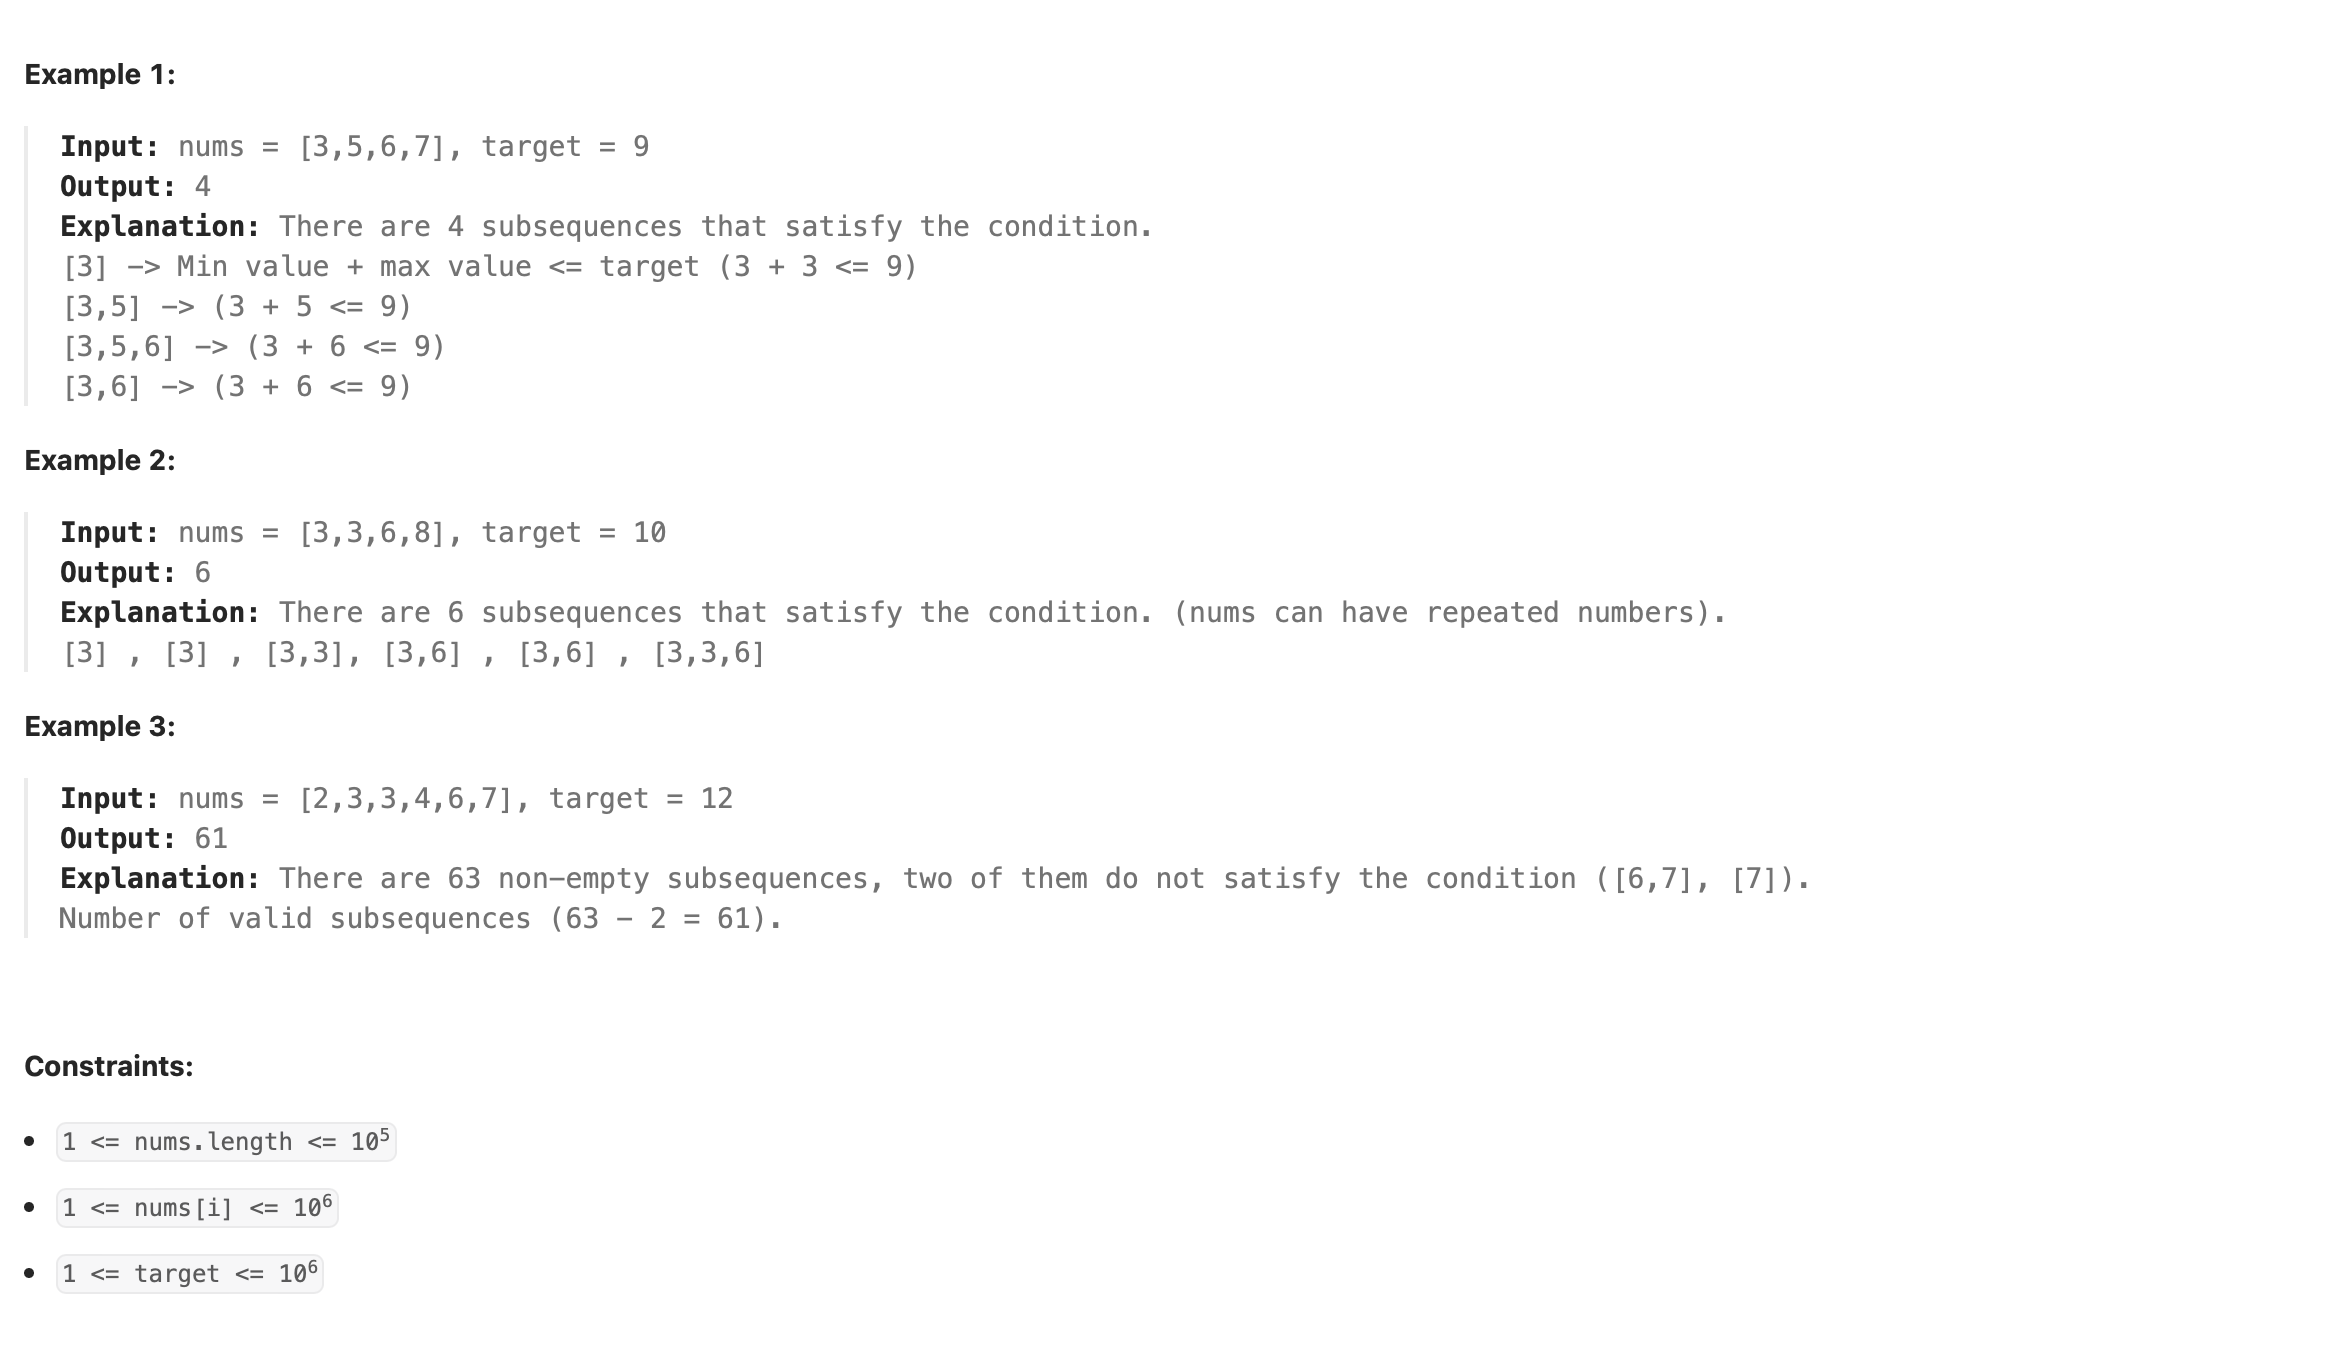

## Approach Overview

Scan through `nums` and use two pointers (representing the min and max elements) to check if the current pair of min / max elements form a valid subsequence (i.e if min + max <= target). 

## Detailed Explanation

We scan through `nums` array using two pointer approach. The two pointers point to the min / max elements in `nums`. 

We then check whether the current min / max element pair located at the pointer's positions form a valid subsequence (N.B: a subsequence is valid if the min + max element <= target value). 

If the min / max element pair is not valid (i.e. cannot form a valid subsequence because min + max element > target ), then we just decrement the right pointer to search for another 'maximum' element to complement the current minimum element to form a potentially a valid subsequence. 

Each time we find a valid pair of min / max element in nums, we compute the total number of valid subsequences they can form. 

<i> # calculating the total number of valid subsequences the current min / max element pair can form </i>

`count = pow(2, right - left, mod)` 

We mod the result with $10^9 + 7$ to ensure count doesn't become too large that it causes integer overflow error.


## Key Challenges

This problem was interesting. To be honest, I would have never been able to figure out the solution on my own. The bit that proved most difficult was figuring out how to calculate the total number of valid subsequences for every valid pair of min / max element pair. I also had no clue what **modulo** $(10^9 + 7)$


## Solution:

In [ ]:
class Solution:
    def numSubseq(self, nums: List[int], target: int) -> int:
        
        # sort nums array in ascending order
        nums = sorted(nums)
        
        # initialize modulo (10^9 + 7)
        mod = 10 ** 9 + 7
        
        # initialize right pointer 
        right = len(nums) - 1
        
        # initialize count 
        # (variable to store total number of valid subsequences of nums)
        count = 0

        # loop through every element position in nums
        for left in range(len(nums)): 
            
            # continue decrementing right pointer as long as current min & max element does NOT form a valid subsequence (min + max > target) and as long as pointers has not gone out of bounds
            while left <= right and nums[left] + nums[right] > target:
                
                # decrement right pointer
                right -= 1
    
            # check if pointers hasn't gone out of bounds
            if left <= right:

                # calculate the current total number of valid subsequences 
                count += pow(2, right - left, mod)
                
        # return the total number of valid subsequences (modulo 109 + 7)
        return count % mod